In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
def cost_function(X, Y, theta):
    samples = Y.size
    cost = 0
    h = np.dot(X, theta)
    cost = (1/(2 * samples)) * np.sum(np.square(np.dot(X, theta) - Y))
    return cost

In [10]:
def gradient_descent(X, Y, theta, learning_rate, iterations):
    samples = Y.shape[0]
    theta = theta.copy()
    for i in range(iterations):
        theta = theta - (learning_rate / samples) * \
            (np.dot(X, theta) - Y).dot(X)
        cost = cost_function(X, Y, theta)
        #print(f'Cost: {cost:.3f}')
    return theta, cost

In [11]:
def fetch_dataset(file_name, delimiter=','):
    X = np.array([])
    Y = np.array([])
    file = open(file_name)
    for line in file:
        temp = line.split(delimiter)
        X = np.append(X, float(temp[0]))
        temp[1] = temp[1].replace('\n', '')
        Y = np.append(Y, float(temp[1]))
    file.close()
    return X, Y

In [12]:
def plot_data(X, Y, predicted=None):
    plt.scatter(X, Y, marker='x', c='r')
    plt.title('Scatter Plot')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    if predicted is not None:
        plt.plot(X, predicted, '-')
        plt.legend(['Training data', 'Linear Regression'])
    plt.show()

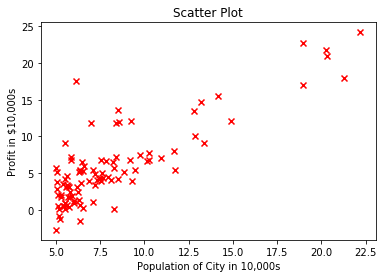

Thetas:  [-3.77312061  1.18071109]
Final cost:  4.478341113349992


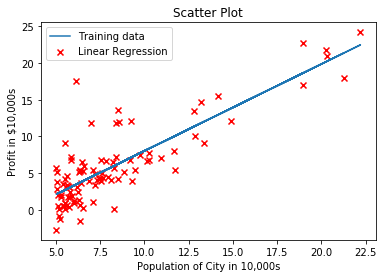

In [13]:
def main():

    # fetching
    X, Y = fetch_dataset('ex1data1.txt')
    samples = Y.size

    # plotting data
    plot_data(X, Y)

    # adding dummy value to X
    X = np.stack([np.ones(samples), X], axis=1)
    theta = np.zeros(2)

    # initializing theta to random values
    theta[0] = random.uniform(0, 1)
    theta[1] = random.uniform(0, 1)

    # hyperparameters
    learning_rate = 0.01
    iterations = 2000

    # running gradient descent
    theta, cost = gradient_descent(X, Y, theta, learning_rate, iterations)

    # printing results
    print('Thetas: ', theta)
    print('Final cost: ', cost)

    # plotting the line of regression
    predicted = np.dot(X, theta)
    plot_data(X[:, 1], Y, predicted)

if __name__ == "__main__":
    main()